### Importing Responses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

aresps = pd.read_csv('./GBM #1 Survey (Responses) - Form Responses 1.csv')
# changing major from "first year transfer" to "Junior"
aresps.iat[17, 4] = 'Junior'

# names and emails redacted for privacy
for i in range(1, 4):
    for j in range(0, len(aresps)):
        aresps.iat[j, i] = 'XXXXX'

aresps

,Timestamp,Email Address,First name,Last name,What year are you?,What is your major?,How did you hear about UES?,"Overall, how satisfied are you with the externship program?",What externship event(s) did you like?,Briefly explain your answer choices.,...,Is there any event(s) that you would like to see UES do in the Winter and Spring? (Ex. a specific type of social or professional workshop),"For UES social events, do you prefer on-campus or off-campus locations?",[Question for Car owners] Are you willing to drive other UES members to off-campus UES events?,"From the listed, which are the ones you are most interested in?",What are some other things you are looking to get out of this club?,Are there any improvements UES can do to make your answers in the two previous questions possible?,"How satisfied are you with the organization's communication (emails, Discord, social media, GBM, etc.)?",Where do you usually get informed about UES events/activities?,What are some factors that influenced you to commit to UES?,Do you have any other feedback you would like to share with the UES Board?
0,11/16/2021 20:33:53,XXXXX,XXXXX,XXXXX,Senior,Management Science,Tabling,5,Week 1: Exploring Career Options Workshop with...,"As a senior, these were the most useful to me ...",...,Professor and PhD student mixer,On-campus,Not a Car owner,"Developing professional skills, Connecting wit...",Alumni and other people in economics,NaN,4,Instagram,Community and network,NaN
1,11/16/2021 20:40:16,XXXXX,XXXXX,XXXXX,Junior,Math-Econ,Economics Department,4,Week 2: Resume and Interview Feedback Activity...,These events gave us the opportunity to talk t...,...,NaN,On-campus,Not a Car owner,"Connecting with other Econ students, Being par...",NaN,NaN,4,Email,The need to socialize.,NaN
2,11/17/2021 7:48:41,XXXXX,XXXXX,XXXXX,Freshman,Business Economics,Economics Department,5,Week 2: Resume and Interview Workshop W/Payal,Because I can have more knowledge to deal with...,...,NaN,On-campus,Not a Car owner,"Experience in Leadership, Being part of an act...",NaN,NaN,4,"Instagram, Discord, Email",Having a lot of friends from the same department,NaN
3,11/16/2021 20:31:32,XXXXX,XXXXX,XXXXX,Freshman,Math-Econ,Tabling,5,"Week 1: UES Exec Hangouts, Week 2: Resume and ...",I thought networking events in general were re...,...,NaN,Both,Maybe,"Developing professional skills, Connecting wit...",NaN,NaN,5,Discord,Majoring in math Econ,NaN
4,11/16/2021 20:32:21,XXXXX,XXXXX,XXXXX,Freshman,Math-Econ,Economics Department,4,Week 1: Exploring Career Options Workshop with...,I liked the variety between events!,...,NaN,Both,Not a Car owner,"Developing professional skills, Connecting wit...",NaN,NaN,5,"Discord, Email",I'm an Econ major,NaN
5,11/16/2021 20:51:48,XXXXX,XXXXX,XXXXX,Freshman,Business Economics,Tabling,5,Week 1: Exploring Career Options Workshop with...,I enjoyed all the events I checked above and I...,...,NaN,On-campus,Not a Car owner,"Developing professional skills, Being part of ...",NaN,NaN,5,Discord,"Externship program, talking to people at the b...",NaN
6,11/16/2021 23:57:27,XXXXX,XXXXX,XXXXX,Freshman,Economics,Tabling,4,Week 1: Exploring Career Options Workshop with...,I am a first-year so I was just looking to lea...,...,I don't really have any specific event in mind...,On-campus,Not a Car owner,"Developing professional skills, Connecting wit...",I just want to learn more of the professional ...,Just having more in-person activities rather t...,5,"Instagram, Discord, Email",As an econ major there isn't a lot of opportun...,What is the difference between a committee mem...
7,11/16/2021 20:33:28,XXXXX,XXXXX,XXXXX,Junior,Economics,Tabling,4,Week 1: Exploring Career Options Workshop with...,Couldn't attend some of them. Mostly fun,...,Ice skating social,Both,Not a Car owner,"Developing professional skills, Connecting wit...","Socials, networ ing and more",No,3,Discord,Economics,No
8,11/16/2021 20:37:22,XXXXX,XXXXX,XXXXX,Sophomore,Business Economics,Tabling,4,"Week 1: UES E

### Functions

In [2]:
# creates and displays a pie chart for a column; prints values represented in the chart
def simplePie(df, colName, title):
    col_vals = df[colName].value_counts()
    plt.pie(col_vals, labels=col_vals.keys(), autopct='%1.1f%%')
    plt.title(title)
    plt.show()
    print(col_vals)
    print("Total Responses: " + str(len(df[colName])))

# creates and displays a bar chart for ratings; prints values represented in the chart
# allows for adding empty bars to the chart
def ratingBar(df, colInd, padding, title, x_label, y_label):
    ratings = df[df.columns[colInd]]
    ratings_val_counts = ratings.value_counts()
    for i in padding:
        ratings_val_counts[i] = 0
    ratings_bar = ratings_val_counts.sort_index().plot.bar()
    ratings_bar.set_xlabel(x_label)
    ratings_bar.set_ylabel(y_label)
    ratings_bar.set_title(title)
    print(ratings_val_counts.sort_index(ascending=False))
    print("Total Responses: " + str(len(df[df.columns[colInd]])))

# counts the number of times a value appears in a column (for cells with csv)
def countColMult(df, colInd):
    col = df[df.columns[colInd]]
    col_expanded = col.str.split(', ', expand=True)
    col_combined = pd.DataFrame()
    for i in col_expanded:
        col_combined = pd.concat([col_combined, col_expanded[i]], ignore_index=True)
    return col_combined.value_counts()

# counts the number of times a value appears in a column (for cells with csv) and provides percentage of people that gave a certain response
def eventAnalysis(df, colNum, group):
    data = countColMult(df, colNum)
    print("Number of " + group + ":")
    print(data)
    print()
    data_percent = data.astype('float')
    for i in data_percent.keys():
        data_percent[i] = 100 * (data_percent[i] / len(df))
    print("Percentage of " + group + ":")
    print(data_percent)

### Pie Charts

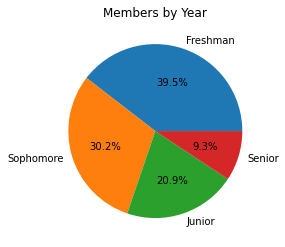

Freshman     17
Sophomore    13
Junior        9
Senior        4
Name: What year are you?, dtype: int64
Total Responses: 43


In [3]:
simplePie(aresps,"What year are you?", "Members by Year")

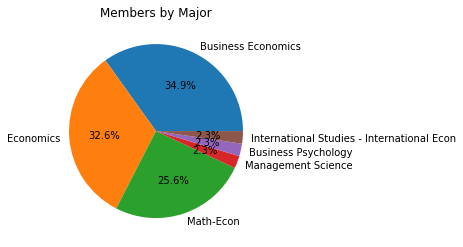

Business Economics                            15
Economics                                     14
Math-Econ                                     11
Management Science                             1
Business Psychology                            1
International Studies - International Econ     1
Name: What is your major?, dtype: int64
Total Responses: 43


In [4]:
simplePie(aresps, "What is your major?", "Members by Major")

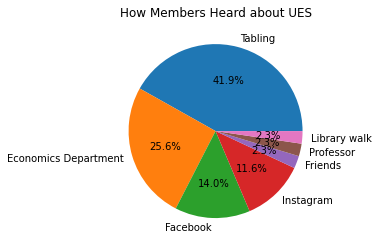

Tabling                 18
Economics Department    11
Facebook                 6
Instagram                5
Friends                  1
Professor                1
Library walk             1
Name: How did you hear about UES?, dtype: int64
Total Responses: 43


In [5]:
simplePie(aresps, "How did you hear about UES?", "How Members Heard about UES")

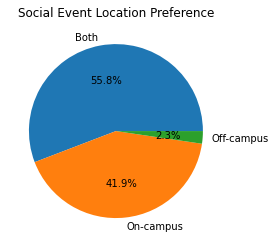

Both          24
On-campus     18
Off-campus     1
Name: For UES social events, do you prefer on-campus or off-campus locations?, dtype: int64
Total Responses: 43


In [6]:
simplePie(aresps, aresps.columns[22], "Social Event Location Preference")

### Bar Charts

5    20
4    22
3     1
2     0
1     0
Name: Overall, how satisfied are you with the externship program?, dtype: int64
Total Responses: 43


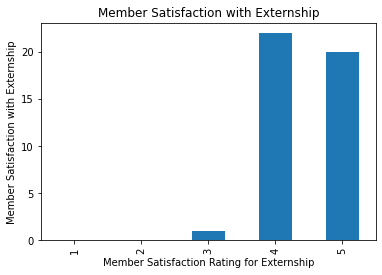

In [7]:
ratingBar(aresps, 7, [1,2], "Member Satisfaction with Externship", "Member Satisfaction Rating for Externship", "Member Satisfaction with Externship")

5    29
4    12
3     2
2     0
1     0
Name: Overall, how satisfied are you with executive board's performance during the externship? (i.e. communication, planning, support.), dtype: int64
Total Responses: 43


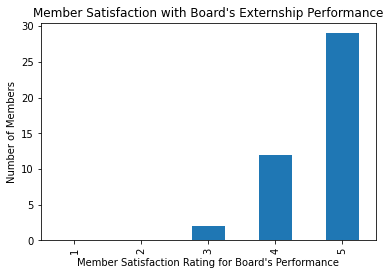

In [8]:
ratingBar(aresps, 12, [1,2], "Member Satisfaction with Board's Externship Performance", "Member Satisfaction Rating for Board's Performance", "Number of Members")

Very Likely      17
Likely           20
Neutral           3
Unlikely          0
Very Unlikely     0
N/A               3
Name: How likely are you to participate in another UES externship ? (Pick N/A if you are graduating next school year), dtype: int64
Total Responses: 43


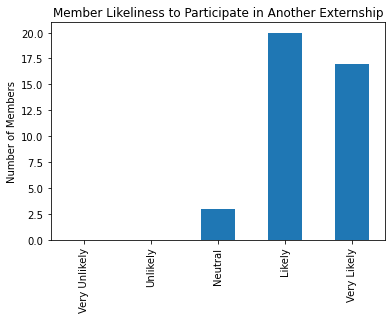

In [9]:
future_ex = aresps[aresps.columns[16]]

# changing blank values to "N/A"
for i in range(len(future_ex)):
    if future_ex.isnull()[i] == True:
        aresps.iat[i, 16] = 'N/A'

future_ex_val_counts = future_ex.value_counts()
future_ex_val_counts['Very Unlikely'] = 0
future_ex_val_counts['Unlikely'] = 0

future_ex_bar = future_ex_val_counts[['Very Unlikely', 'Unlikely', 'Neutral', 'Likely', 'Very Likely']].plot.bar()
future_ex_bar.set_ylabel("Number of Members")
future_ex_bar.set_title("Member Likeliness to Participate in Another Externship")

print(future_ex_val_counts[['Very Likely', 'Likely', 'Neutral', 'Unlikely', 'Very Unlikely', 'N/A']])
print("Total Responses: " + str(len(future_ex)))

5    25
4    16
3     2
2     0
1     0
Name: How satisfied are you with the UES as a whole?, dtype: int64
Total Responses: 43


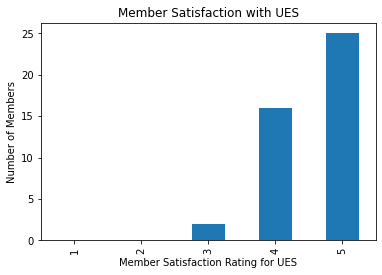

In [10]:
ratingBar(aresps, 17, [1,2], "Member Satisfaction with UES", "Member Satisfaction Rating for UES", "Number of Members")

5    24
4    16
3     3
2     0
1     0
Name: How likely are you to recommend this club to your peers?, dtype: int64
Total Responses: 43


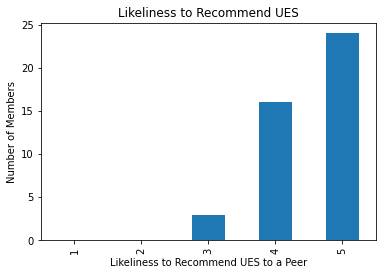

In [11]:
ratingBar(aresps, 18, [1,2], "Likeliness to Recommend UES", "Likeliness to Recommend UES to a Peer", "Number of Members")

### Externship Events Members Liked

In [12]:
eventAnalysis(aresps, 8, "Members")

Number of Members:
Week 1: UES Exec Hangouts                                            31
Week 1: Exploring Career Options Workshop with Professor Famulari    29
Week 3: LinkedIn Workshop                                            27
Week 2: Resume and Interview Workshop W/Payal                        25
Week 3: Alumni Networking Night                                      19
Week 2: Resume and Interview Feedback Activity                       18
Week 1: Exploring Career Options Assignment                          11
Week 3: Speed Networking Night @Rady                                 11
Photo Day 11/11                                                       8
dtype: int64

Percentage of Members:
Week 1: UES Exec Hangouts                                            72.093023
Week 1: Exploring Career Options Workshop with Professor Famulari    67.441860
Week 3: LinkedIn Workshop                                            62.790698
Week 2: Resume and Interview Workshop W/Payal              

### Externship Events Members Disliked

In [13]:
eventAnalysis(aresps, 10, "Members")

Number of Members:
NONE OF THE ABOVE                                                    37
Week 1: Exploring Career Options Workshop with Professor Famulari     3
Week 2: Resume and Interview Workshop W/Payal                         2
Week 3: Speed Networking Night @Rady                                  2
Week 2: Resume and Interview Feedback Activity                        1
Week 3: LinkedIn Workshop                                             1
dtype: int64

Percentage of Members:
NONE OF THE ABOVE                                                    86.046512
Week 1: Exploring Career Options Workshop with Professor Famulari     6.976744
Week 2: Resume and Interview Workshop W/Payal                         4.651163
Week 3: Speed Networking Night @Rady                                  4.651163
Week 2: Resume and Interview Feedback Activity                        2.325581
Week 3: LinkedIn Workshop                                             2.325581
dtype: float64


### Things Members are Interested In

In [14]:
# changing entries to comply with intended csv separation
for i in range(len(aresps[aresps.columns[24]])):
    aresps.iat[i, 24] = aresps.iat[i, 24].replace("exclusive events, socials, alumni", "exclusive events,socials,alumni")

eventAnalysis(aresps, 24, "Members")

Number of Members:
Meeting and befriending new people                           37
Access to UES resources (exclusive events,socials,alumni)    34
Connecting with other Econ students                          34
Developing professional skills                               34
Being part of an active community @UCSD                      33
Developing skills for personal life/self-interest            28
Experience in Leadership                                     20
Learning about topics other than Econ                        13
dtype: int64

Percentage of Members:
Meeting and befriending new people                           86.046512
Access to UES resources (exclusive events,socials,alumni)    79.069767
Connecting with other Econ students                          79.069767
Developing professional skills                               79.069767
Being part of an active community @UCSD                      76.744186
Developing skills for personal life/self-interest            65.116279
Experi

### How Members Stay Informed About UES

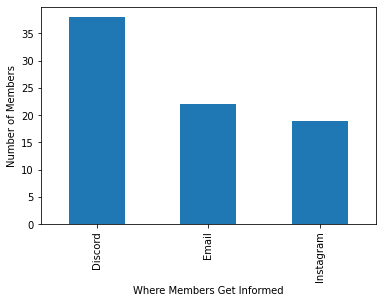

Discord      38
Email        22
Instagram    19
dtype: int64


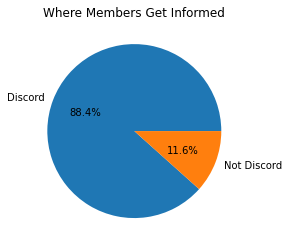

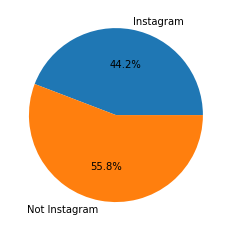

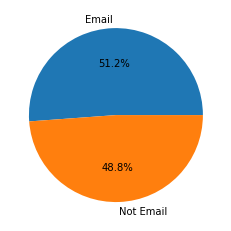

In [15]:
inform = aresps[aresps.columns[28]]
inform_count = countColMult(aresps, 28)
inform_display_names = []

for i in inform_count.index:
    inform_display_names.append(''.join(i))
inform_count.index = inform_display_names

inform_bar = inform_count.plot.bar()
inform_bar.set_xlabel("Where Members Get Informed")
inform_bar.set_ylabel("Number of Members")
plt.show()

print(inform_count)

plt.title('Where Members Get Informed')
plt.pie([inform_count['Discord']/len(inform), 1 - inform_count['Discord']/len(inform)], labels=['Discord', 'Not Discord'], autopct='%1.1f%%')
plt.show()

plt.pie([inform_count['Instagram']/len(inform), 1 - inform_count['Instagram']/len(inform)], labels=['Instagram', 'Not Instagram'], autopct='%1.1f%%')
plt.show()

plt.pie([inform_count['Email']/len(inform), 1 - inform_count['Email']/len(inform)], labels=['Email', 'Not Email'], autopct='%1.1f%%')
plt.show()

### Data Split by Year

In [16]:
year_grouping = aresps.groupby(["What year are you?"])
senior = year_grouping.get_group('Senior')
junior = year_grouping.get_group('Junior')
soph = year_grouping.get_group('Sophomore')
fresh = year_grouping.get_group('Freshman')

##### Externship Events Freshmen Liked

In [17]:
eventAnalysis(fresh, 8, "Freshmen")

Number of Freshmen:
Week 1: UES Exec Hangouts                                            13
Week 3: LinkedIn Workshop                                            12
Week 1: Exploring Career Options Workshop with Professor Famulari    11
Week 2: Resume and Interview Workshop W/Payal                         8
Week 2: Resume and Interview Feedback Activity                        7
Week 3: Alumni Networking Night                                       7
Week 1: Exploring Career Options Assignment                           6
Week 3: Speed Networking Night @Rady                                  5
Photo Day 11/11                                                       2
dtype: int64

Percentage of Freshmen:
Week 1: UES Exec Hangouts                                            76.470588
Week 3: LinkedIn Workshop                                            70.588235
Week 1: Exploring Career Options Workshop with Professor Famulari    64.705882
Week 2: Resume and Interview Workshop W/Payal            

##### Externship Events Sophomores Liked

In [18]:
eventAnalysis(soph, 8, "Sophomores")

Number of Sophomores:
Week 1: UES Exec Hangouts                                            9
Week 1: Exploring Career Options Workshop with Professor Famulari    8
Week 2: Resume and Interview Workshop W/Payal                        8
Week 3: Alumni Networking Night                                      8
Week 3: LinkedIn Workshop                                            8
Week 2: Resume and Interview Feedback Activity                       4
Photo Day 11/11                                                      2
Week 1: Exploring Career Options Assignment                          2
Week 3: Speed Networking Night @Rady                                 2
dtype: int64

Percentage of Sophomores:
Week 1: UES Exec Hangouts                                            69.230769
Week 1: Exploring Career Options Workshop with Professor Famulari    61.538462
Week 2: Resume and Interview Workshop W/Payal                        61.538462
Week 3: Alumni Networking Night                               

##### Externship Events Juniors Liked

In [19]:
eventAnalysis(junior, 8, "Juniors")

Number of Juniors:
Week 1: Exploring Career Options Workshop with Professor Famulari    7
Week 1: UES Exec Hangouts                                            7
Week 2: Resume and Interview Workshop W/Payal                        6
Week 3: LinkedIn Workshop                                            6
Week 2: Resume and Interview Feedback Activity                       5
Photo Day 11/11                                                      3
Week 3: Alumni Networking Night                                      2
Week 3: Speed Networking Night @Rady                                 2
Week 1: Exploring Career Options Assignment                          1
dtype: int64

Percentage of Juniors:
Week 1: Exploring Career Options Workshop with Professor Famulari    77.777778
Week 1: UES Exec Hangouts                                            77.777778
Week 2: Resume and Interview Workshop W/Payal                        66.666667
Week 3: LinkedIn Workshop                                           

##### Externship Events Seniors Liked

In [20]:
eventAnalysis(senior, 8, "Seniors")

Number of Seniors:
Week 1: Exploring Career Options Workshop with Professor Famulari    3
Week 2: Resume and Interview Workshop W/Payal                        3
Week 1: Exploring Career Options Assignment                          2
Week 1: UES Exec Hangouts                                            2
Week 2: Resume and Interview Feedback Activity                       2
Week 3: Alumni Networking Night                                      2
Week 3: Speed Networking Night @Rady                                 2
Photo Day 11/11                                                      1
Week 3: LinkedIn Workshop                                            1
dtype: int64

Percentage of Seniors:
Week 1: Exploring Career Options Workshop with Professor Famulari    75.0
Week 2: Resume and Interview Workshop W/Payal                        75.0
Week 1: Exploring Career Options Assignment                          50.0
Week 1: UES Exec Hangouts                                            50.0
Week 2: R